<a href="https://colab.research.google.com/github/Vijayaadhav/Regression/blob/main/House_Price_Prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns
import statistics 

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Train.csv']))

In [ ]:
df.head(20)

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe(include = 'all')

### DATA CLEANING

Null value representation:

In [ ]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
l = []
for i in df.columns:
    l.append((round((df[i].isnull().sum()/df.shape[0])*100,2)))
arr = np.array(l)

In [ ]:
null = pd.DataFrame(data=arr,index = df.columns,columns = ['Percentage of null'])
null

,Percentage of null
area_type,0.00
availability,0.00
location,0.01
size,0.12
society,41.31
total_sqft,0.00
bath,0.55
balcony,4.57
price,0.00


* since society has 41% null values , we can drop that column.

In [ ]:
df = df.drop('society',axis = 1)

KeyError: ignored

Duplicates Removal

In [ ]:
df[df.duplicated()].count()

area_type       568
availability    568
location        568
size            568
total_sqft      568
bath            568
balcony         564
price           568
dtype: int64

In [ ]:
df.drop_duplicates(inplace = True)
df.shape

(12752, 8)

* After removing duplicates , the records are reduced from 13320 to 12752

Handling missing values

In [ ]:
df['size'] = df['size'].apply(lambda x:x[0] if (type(x) != float) else x)
df['size'] = df['size'].fillna(value = statistics.mode(df['size']))

In [ ]:
df['bath'] = df['bath'].fillna(value = statistics.mode(df['bath']))

In [ ]:
df['balcony'] = df['balcony'].fillna(value = statistics.mode(df['balcony']))

In [ ]:
df['total_sqft'] = df['total_sqft'].apply(lambda x:x[0:4])
df = df[df['total_sqft'].apply(lambda x: x.isnumeric() )]
df['total_sqft'] = df['total_sqft'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200,2.0,1.0,51.00


### EDA:

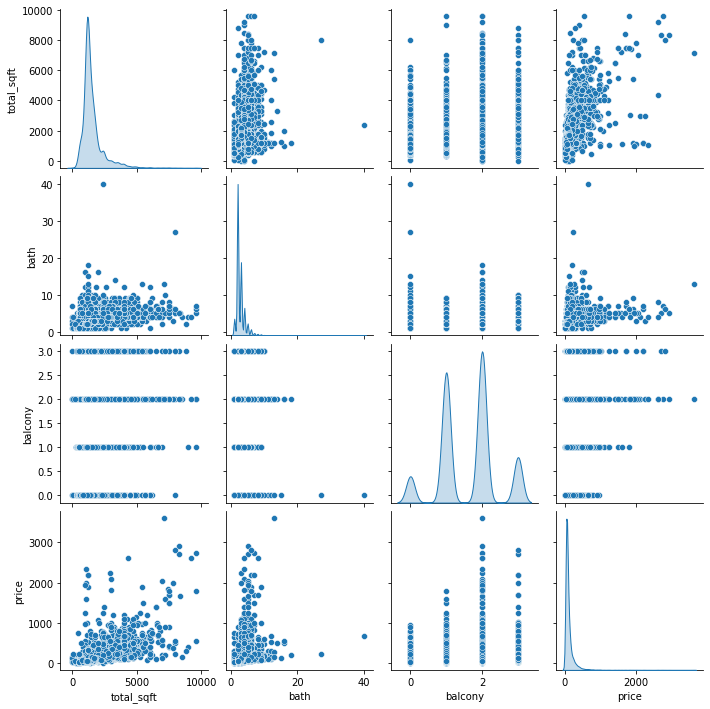

In [ ]:
sns.pairplot(df,diag_kind = 'kde')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12647 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12647 non-null  object 
 1   availability  12647 non-null  object 
 2   location      12646 non-null  object 
 3   size          12647 non-null  object 
 4   total_sqft    12647 non-null  int64  
 5   bath          12647 non-null  float64
 6   balcony       12647 non-null  float64
 7   price         12647 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 889.2+ KB


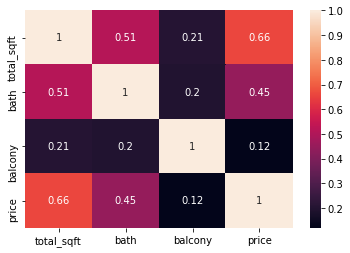

In [ ]:
sns.heatmap(df.corr(),annot = True)

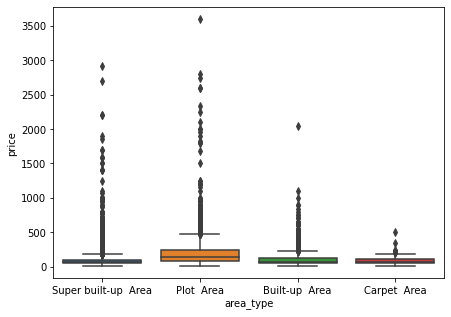

In [ ]:
plt.figure(figsize = (7,5))
sns.boxplot(x = df['area_type'],y=df['price'])

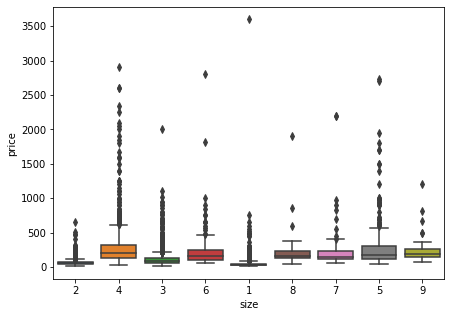

In [ ]:
plt.figure(figsize = (7,5))
sns.boxplot(x = df['size'],y=df['price'])

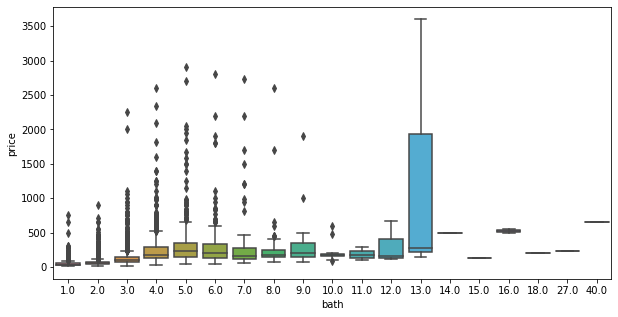

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(x = df['bath'],y=df['price'])

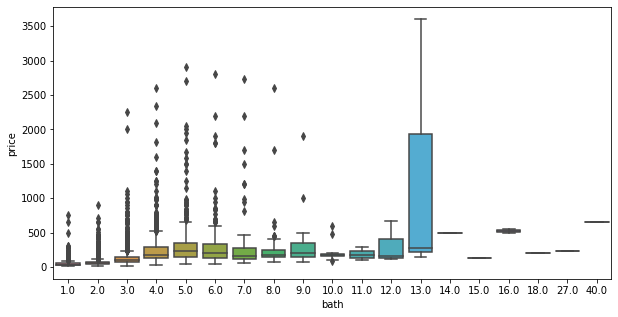

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(x = df['bath'],y=df['price'])

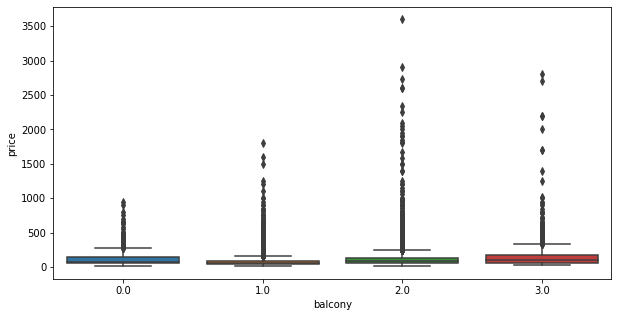

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(x = df['balcony'],y=df['price'])

### Feature Engineering

Availability

* Converting the date of availability into 'others' other than 'Ready To Move'

In [ ]:
df['availability'] = df['availability'].apply(lambda x: x if (x == 'Ready To Move') else 'Not Ready' )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Not Ready,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200,2.0,1.0,51.00


In [ ]:
df['availability'].value_counts()

Ready To Move    10091
Not Ready         2556
Name: availability, dtype: int64

Bath

* since there are less no of reccords in bathrooms greater than 9 , it is removed

In [ ]:
df['bath'].value_counts()

2.0     6546
3.0     3167
4.0     1194
1.0      714
5.0      518
6.0      268
7.0      102
8.0       64
9.0       41
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
18.0       1
40.0       1
15.0       1
14.0       1
Name: bath, dtype: int64

In [ ]:
df = df[df['bath'] < 10.0]

Location

In [ ]:
value_counts = pd.DataFrame(df['location'].value_counts())

In [ ]:
value_counts = value_counts[(value_counts['location']>25)].index

In [ ]:
value_counts

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Kanakpura Road',
       'Thanisandra', 'Yelahanka', 'Marathahalli', 'Hebbal',
       'Raja Rajeshwari Nagar', 'Uttarahalli',
       ...
       'Ananth Nagar', 'Kammasandra', 'Padmanabhanagar', 'Anandapura',
       'Kodichikkanahalli', 'Somasundara Palya', 'Gubbalala',
       'Bommasandra Industrial Area', 'Ambalipura', 'Kothannur'],
      dtype='object', length=111)

* since we have more unique values present in the lcoation column ,we ar converting the least appeared values to 'others'

In [ ]:
df['location']= df['location'].apply(lambda x : x if x in value_counts else 'others') 

In [ ]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Not Ready,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,others,4,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,others,3,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200,2.0,1.0,51.00


### Encoding

In [ ]:
df_encoded = pd.get_dummies(df,columns = ['area_type','availability','location','size','bath','balcony'],drop_first = True)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12614 entries, 0 to 13318
Columns: 136 entries, total_sqft to balcony_3.0
dtypes: float64(1), int64(1), uint8(134)
memory usage: 1.9 MB


In [ ]:
df_encoded.head()

,total_sqft,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Ready To Move,location_7th Phase JP Nagar,location_8th Phase JP Nagar,location_9th Phase JP Nagar,location_Akshaya Nagar,location_Ambalipura,location_Ambedkar Nagar,location_Anandapura,location_Ananth Nagar,location_Anekal,location_Attibele,location_BTM 2nd Stage,location_Balagere,location_Banashankari,location_Bannerghatta Road,location_Basavangudi,location_Begur Road,location_Bellandur,location_Bhoganhalli,location_Bisuvanahalli,location_Bommanahalli,location_Bommasandra,location_Bommasandra Industrial Area,location_Brookefield,location_Budigere,location_CV Raman Nagar,location_Chandapura,location_Channasandra,location_Chikkalasandra,location_Devanahalli,location_Dodda Nekkundi,location_Doddathoguru,location_Electronic City,location_Electronic City Phase II,location_Electronics City Phase 1,...,location_Ramamurthy Nagar,location_Sahakara Nagar,location_Sarjapur,location_Sarjapur Road,location_Somasundara Palya,location_Subramanyapura,location_TC Palaya,location_Talaghattapura,location_Thanisandra,location_Thigalarapalya,location_Tumkur Road,location_Uttarahalli,location_Varthur,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur,location_others,size_2,size_3,size_4,size_5,size_6,size_7,size_8,size_9,bath_2.0,bath_3.0,bath_4.0,bath_5.0,bath_6.0,bath_7.0,bath_8.0,bath_9.0,balcony_1.0,balcony_2.0,balcony_3.0
0,1056,39.07,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,2600,120.00,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1440,62.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1521,95.00,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1200,51.00,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


### Model - Linear Regression

In [ ]:
import statsmodels.api as sm

In [ ]:
xc =sm.add_constant(X)
model = sm.OLS(y,xc).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     105.1
Date:                Fri, 13 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:47:21   Log-Likelihood:                -76193.
No. Observations:               12614   AIC:                         1.527e+05
Df Residuals:                   12478   BIC:                         1.537e+05
Df Model:                         135                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  -65.2294     18.050     -3.614      0.000    -100.610     -29.849
total_sqft                               0.1072      0.001     73.172      0.000       0.104       0.110
area_type_Carpet  Area                  14.9423     11.880      1.258      0.209      -8.345      38.230
area_type_Plot  Area                    77.8756      3.473     22.422      0.000      71.067      84.684
area_type_Super built-up  Area           8.6918      2.508      3.466      0.001       3.776      13.607
availability_Ready To Move              -7.2044      2.490     -2.893      0.004     -12.085      -2.324
location_7th Phase JP Nagar             14.7465     19.240      0.766      0.443     -22.967      52.460
location_8th Phase JP Nagar              3.1451     21.940      0.143      0.886     -39.860      46.150
location_9th Phase JP Nagar             -3.2162     23.116     -0.139      0.889     -48.528      42.096
location_Akshaya Nagar                  -0.5676     21.573     -0.026      0.979     -42.854      41.719
location_Ambalipura                      8.9603     26.319      0.340      0.734     -42.629      60.549
location_Ambedkar Nagar                 -1.4335     25.622     -0.056      0.955     -51.657      48.790
location_Anandapura                    -19.0434     26.082     -0.730      0.465     -70.168      32.081
location_Ananth Nagar                   -3.1247     25.537     -0.122      0.903     -53.180      46.931
location_Anekal                        -21.9588     25.352     -0.866      0.386     -71.653      27.736
location_Attibele                      -12.6042     23.453     -0.537      0.591     -58.576      33.368
location_BTM 2nd Stage                  55.5578     25.524      2.177      0.030       5.528     105.588
location_Balagere                       16.5546     23.312      0.710      0.478     -29.140      62.249
location_Banashankari                   21.2800     20.883      1.019      0.308     -19.654      62.214
location_Bannerghatta Road              10.8946     19.024      0.573      0.567     -26.396      48.185
location_Basavangudi                    78.1262     25.302      3.088      0.002      28.531     127.721
location_Begur Road                    -17.1889     20.887     -0.823      0.411     -58.131      23.753
location_Bellandur                       4.8105     20.085      0.240      0.811     -34.560      44.181
location_Bhoganhalli                    -6.0553     23.779     -0.255      0.799     -52.667      40.556
location_Bisuvanahalli                  16.2191     23.310      0.696      0.487     -29.473      61.911
location_Bommanahalli                  -10.8594     24.283     -0.447      0.655     -58.459      36.740
location_Bommasandra                  

Model - Linear Regression

In [ ]:
x = df_encoded.drop('price',axis = 1)
y = df_encoded['price']

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0,test_size=0.2)

pipelr=Pipeline((
    ("pt",PowerTransformer()),
    ("sc", StandardScaler()),
    #("rfe",RFE(estimator=LinearRegression(),n_features_to_select=7)),
    ("lr", LinearRegression())
))

pipelr.fit(xtrain,ytrain)
ypred_train=np.abs(pipelr.predict(xtrain))
ypred_test=np.abs(pipelr.predict(xtest))

print("Testing Accuracy R2 score")
print(pipelr.score(xtest,ytest))
print("Training Accuracy R2 score")
print(pipelr.score(xtrain,ytrain))

print("Testing Accuracy RMSLE score")
print(np.sqrt(mean_squared_log_error(ytest,ypred_test)))
print("Training Accuracy RMSLE score")
print(np.sqrt(mean_squared_log_error( ytrain,ypred_train)))

Testing Accuracy R2 score
0.4365078156722789
Training Accuracy R2 score
0.46295474244074325
Testing Accuracy RMSLE score
0.5803635198794446
Training Accuracy RMSLE score
0.566892644908666


Model - Random Forest Regressor

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error,mean_squared_error

x = df_encoded.drop('price',axis = 1)
y = np.log(df_encoded['price'])
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0,test_size=0.2)
 
pipebr=Pipeline((
    ("pt",PowerTransformer()),
    ("ss",StandardScaler()),
  #("skb",SelectKBest(f_classif,k=5)),
    ("gbr", RandomForestRegressor(random_state=0,n_estimators=150))
))

pipebr.fit(xtrain,ytrain)
ypred_train=np.abs(pipebr.predict(xtrain))
ypred_test=np.abs(pipebr.predict(xtest))

print("Testing Accuracy R2 score")
print(pipebr.score(xtest,ytest))
print("Training Accuracy R2 score")
print(pipebr.score(xtrain,ytrain))

print("Testing Accuracy RMSLE score")
print(np.sqrt(mean_squared_error(ytest,ypred_test)))
print("Training Accuracy RMSLE score")
print(np.sqrt(mean_squared_error( ytrain,ypred_train)))

Testing Accuracy R2 score
0.7439913621658694
Training Accuracy R2 score
0.9506468176384524
Testing Accuracy RMSLE score
0.37053529644342564
Training Accuracy RMSLE score
0.15999556447018348


In [ ]:
from sklearn.model_selection import cross_val_score
be=[]
ve=[]
for i in [5,10,20,40,60,80,100,120,150,200,250,300,400]:
  dt=RandomForestRegressor(n_estimators=i,random_state=0)
  score=cross_val_score(dt,xtrain,ytrain,cv=5,scoring='neg_mean_squared_error')
  print('n_estimator:',i)
  print('Bias Error',np.mean(np.sqrt(np.abs(score))))
  print('Variance Error',np.std(np.sqrt(np.abs(score)))/np.mean(np.sqrt(np.abs(score))))
  be.append(np.mean(np.sqrt(np.abs(score))))
  ve.append(np.std(np.sqrt(np.abs(score)))/np.mean(np.sqrt(np.abs(score))))

n_estimator: 5
Bias Error 106.30296212118529
Variance Error 0.0973992961084445
n_estimator: 10
Bias Error 103.78417196437033
Variance Error 0.09557086715357886
n_estimator: 20
Bias Error 100.90503261483569
Variance Error 0.11574576057644806
n_estimator: 40
Bias Error 100.5502017805538
Variance Error 0.1147775017060692
n_estimator: 60
Bias Error 100.74033407160648
Variance Error 0.11310542896470084
n_estimator: 80
Bias Error 100.77899202942746
Variance Error 0.11060125164700027
n_estimator: 100
Bias Error 101.28215630933413
Variance Error 0.10669814673153237
n_estimator: 120
Bias Error 101.5262581061535
Variance Error 0.10565171984063179
n_estimator: 150
Bias Error 101.54481862050504
Variance Error 0.10283494576559628
n_estimator: 200
Bias Error 101.4699483087908
Variance Error 0.10670413405693578
n_estimator: 250
Bias Error 101.35077199102417
Variance Error 0.10613322932271987
n_estimator: 300
Bias Error 101.42095588721645
Variance Error 0.10482969068143982
n_estimator: 400
Bias Error 

* This model has training accuracy of 95% and testing accuracy of 74% which leads to overfitting.

Model - Gradient Boosting regressor

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectKBest

x = df_encoded.drop('price',axis = 1)
y = np.log(df_encoded['price'])
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0,test_size=0.2)

pipex=Pipeline((
    ("pt",PowerTransformer()),
    ("sc", StandardScaler()),
    #("skb",SelectKBest(f_classif,k=5)),
  ("gbr", GradientBoostingRegressor(random_state=0,n_estimators=73))
))

pipex.fit(xtrain,ytrain)
ypred_train=np.abs(pipex.predict(xtrain))
ypred_test=np.abs(pipex.predict(xtest))

print("Testing Accuracy R2 score")
print(pipex.score(xtest,ytest))
print("Training Accuracy R2 score")
print(pipex.score(xtrain,ytrain))

print("Testing Accuracy RMSLE score")
print(np.sqrt(mean_squared_log_error(ytest,ypred_test)))
print("Training Accuracy RMSLE score")
print(np.sqrt(mean_squared_log_error( ytrain,ypred_train)))

Testing Accuracy R2 score
0.7264891569934333
Training Accuracy R2 score
0.7608939293309481
Testing Accuracy RMSLE score
0.06900909769572362
Training Accuracy RMSLE score
0.06368789567643027


In [ ]:
from sklearn.model_selection import GridSearchCV
param=[{'n_estimators':np.arange(1,100)}]
grid=GridSearchCV(estimator=GradientBoostingRegressor(random_state=0),param_grid=param,scoring='r2',cv=5)

In [ ]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
             param_grid=[{'n

In [ ]:
grid.best_params_


{'n_estimators': 73}

* Gradient boosting regressor gives best score

###Final Model

In [ ]:
m_final = pipex.fit(x,y)